# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

# Checkout data

In [2]:
df = pd.read_csv('Visitor_Prediction_Multiple_Linear_Regression_data.csv')
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [4]:
df.keys()

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Unnamed: 7'],
      dtype='object')

# Data Cleaning/Preprossing

In [5]:
df1 = df.dropna(axis=1,how='all',inplace=True)

In [6]:
df2 = df.drop(['Date'],axis=1)
df2.head(3)

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,183738,1260228,1706478,1060860448,0,0
1,193763,1270561,1690727,1031846645,0,0
2,210479,1248183,1726157,1010867575,0,0


# Data visualization

In [7]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

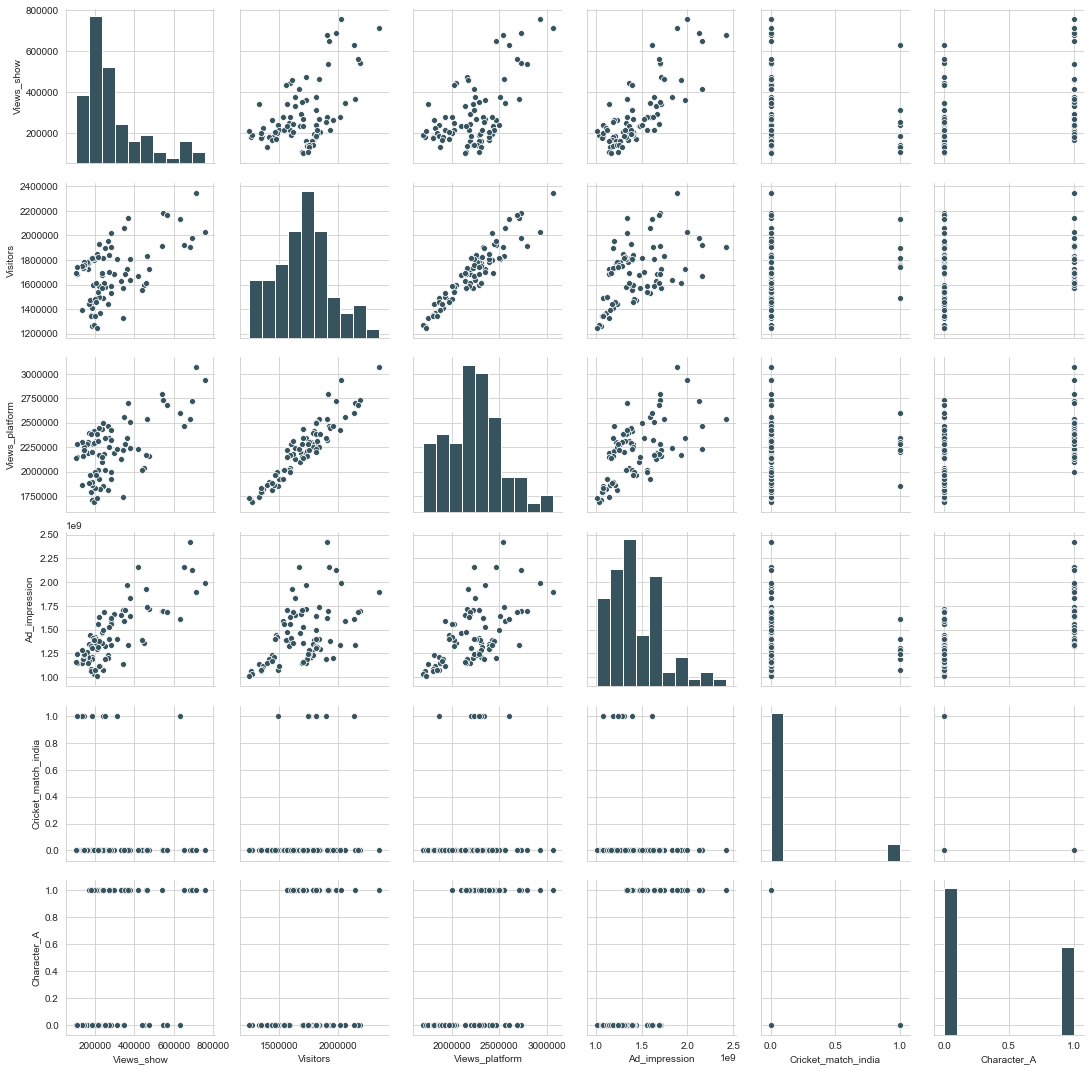

In [8]:
sns.pairplot(df2)

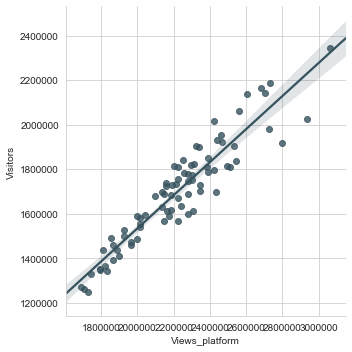

In [9]:
sns.lmplot('Views_platform','Visitors',df2)

# Creating X and Y arrays

In [10]:
X = df2.iloc[:,[0,2,3,4,5]]
y = df2.iloc[:,1]

# Creating train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

# Creating and training model

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model evaluation

In [14]:
print(lm.intercept_)

-118269.36600993131


In [15]:
lm.coef_

array([-1.99791415e-02,  8.06556194e-01,  5.51799591e-05,  2.45202185e+04,
       -1.20299755e+05])

In [16]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Views_show,-0.019979
Views_platform,0.806556
Ad_impression,0.000055
Cricket_match_india,24520.218495
Character_A,-120299.755250


# Predictions from our model

In [17]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Y_Prediction')

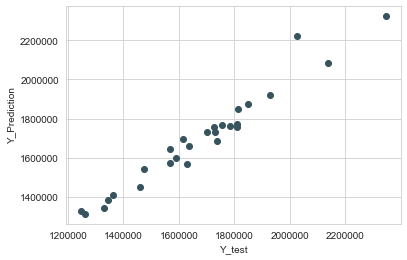

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_Prediction')

In [19]:
r2_score(y_test,y_pred)

0.9500782428462058

# Regression evaluation matrics

In [20]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 42502.614204910875
MSE: 3264078712.0395656
RMSE: 57132.11629232341
